## Linear Model

Linear regression is a very simple approach for supervised learning. It's a useful tool for predicting a quantitative response. It has been around for quite a long time and is the topic of innumerable textbooks. Though it may seem too simple when compared to advanced models, it still works widely as a statistical learning method.

Although simple, linear regression can work as a great benchmark when we are training our statistical learning model. And beyond linear regression, we can have many generalizations and extensions which make simple linear regression powerful.

So it is very important to have a deep understanding of linear regression and learn basic statistical learning essentials based on this simple but important model.

Linear regression with **Normal Equation**

In [28]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs


# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### Linear Regression Models and Ordinary Least Squares (OLS)

#### Model assumption:
$$y =X\beta + \epsilon $$
OR 
$$y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon$$
There are lots of different model assumptions for linear model. In our case, to make it comparable to other models and put it simply, we can presume such points:

1. Linear relationship: Y can be expressed as a linear expression of X
2. Random sampling: not all the $X_i$ are the same
3. $E[\epsilon] = 0, E[\epsilon|X] = 0$, which indicates that $\epsilon$ is just white noise, if $\epsilon$ is not around 0, we can shift part of the residual to the intercept term 
4. No perfect colinearity in $X$: otherwise we can express those variables as linear combination of other dimensions

Here in this model expression, inside $X$ we already have intercept $\beta_0$. $X^T = (1, X_1, X_2, ... ,X_p)$ where $1$ is the vector of all numbers 1. 

$$
X = \begin{bmatrix}
1 & x_{11} & x_{12} & ... & x_{1p}\\
1 & x_{21} & x_{22} & ... & x_{2p}\\
... & ... & ... & ... & ...\\
1 & x_{N1} & x_{N2} & ... & x_{Np}\\
\end{bmatrix}
$$ 

Here $N$ is the number of total samples and p is the number of total features. So considering the intercept, totally in $X$ the shape is $N \times(p+1)$

#### Loss function:
Here in linear regression, we can easily define loss function as of **MSE: mean square error**
$$RSS(\beta) = \sum_{i=1}^N(y_i - f(x_i))^2 = \sum_{i=1}^N(y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j)^2$$

Or equivalently:
$$RSS(\beta) = (y- X\beta)^T(y - X\beta)$$

How to solve this?
$$\frac{\partial RSS(\beta)}{\partial \beta} = -2X^T(y-X\beta)$$
$$\frac{\partial^2 RSS(\beta)}{\partial \beta \partial \beta^T} = 2X^TX$$

If $X$ is full rank (here we only consider full rank), $X^TX$ is positive definite, so based on the first order condition:
$$\frac{\partial RSS(\beta)}{\partial \beta} = 0$$
We can get 
$$X^T(y-X\beta) = 0$$
So
$$\hat{\beta} = (X^TX)^{-1}X^Ty$$
Here $\hat{}$ means the estimation of the parameter

So above is the linear model's  normal equation.

What if we do not have so many dimensions, but just 1 $X_1$ together with $X_0 = 1$ as intercept?
And how about we have no regressor but just intercept $X_0 = 1$?

**Leave this as homework**, actually you can also try to translate the code below

To better illustrate and visualize some examples, we will start from univariable regression as $y  \sim X$

In [33]:
## generate samples
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 3 + 4 * X + np.random.randn(100, 1)

[-1, 3, -2, 15]

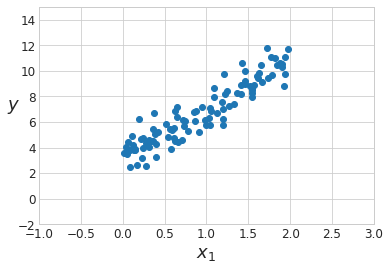

In [29]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(X, y)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$y$", rotation=0, fontsize=18)
ax.axis([-1, 3, -2, 15])



Based on our normal equation 
$$\hat{\beta} = (X^TX)^{-1}X^Ty$$

We can do like this:

In [24]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance, which is the intercept
beta_estimation = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
beta_estimation

array([[3.21509616],
       [3.77011339]])

Now lets fit some new points:

In [25]:
X_new = np.array([[-0.5], [2.5]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance, as intercept
y_predict = X_new_b.dot(beta_estimation)
y_predict

array([[ 1.33003946],
       [12.64037962]])

[-1, 3, -2, 15]

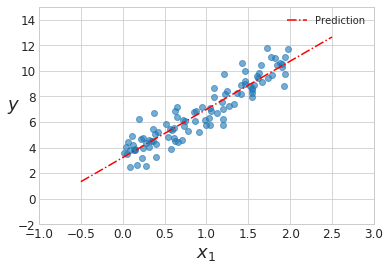

In [32]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(X, y, alpha=0.6)
ax.plot(X_new, y_predict, 'r-.', label='Prediction')
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$y$", rotation=0, fontsize=18)
ax.legend()
ax.axis([-1, 3, -2, 15])


Since we are now learning scikit learn. We can also use scikit learn model to solve this problem:

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.21509616]), array([[3.77011339]]))

In [41]:
## Compare the difference
np.allclose(beta_estimation.reshape(-1) , np.array([lin_reg.intercept_[0], lin_reg.coef_[0][0]]))

True

In [42]:
X_new

array([[-0.5],
       [ 2.5]])

In [43]:
lin_reg.predict(X_new)

array([[ 1.33003946],
       [12.64037962]])

[-1, 3, -2, 15]

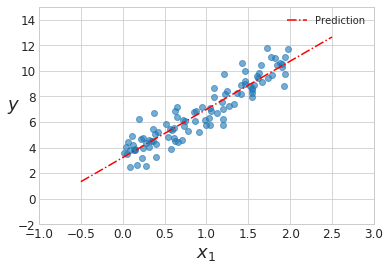

In [44]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(X, y, alpha=0.6)
ax.plot(X_new, lin_reg.predict(X_new), 'r-.', label='Prediction')
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$y$", rotation=0, fontsize=18)
ax.legend()
ax.axis([-1, 3, -2, 15])


### Gradient descent:
It's lucky that the OLS has an explicit mathematical formula for the solution. But it's not always the case, as we can see for other models later. So how can we deal with that?

Another important approach for solving these questions is **gradient descent**.